In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df=pd.read_excel('Copy of loan.xlsx')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing 

In [ ]:
X_preprocessed


array([['Male', 'No', '0', ..., 0.0, 0.0, 1.0],
       ['Male', 'Yes', '1', ..., 0.0, 0.0, 0.0],
       ['Male', 'Yes', '0', ..., 0.0, 0.0, 1.0],
       ...,
       ['Male', 'Yes', '1', ..., 0.0, 0.0, 1.0],
       ['Male', 'Yes', '2', ..., 0.0, 0.0, 1.0],
       ['Female', 'No', '0', ..., 0.0, 1.0, 0.0]], dtype=object)

Checking NULL values in data

AND

Handeling all the NULL values.

In [5]:
df.isnull().sum()
#We have null values in 7 variables 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#1st column Gender
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)

In [8]:
#2nd column Married
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [9]:
df['Married'].fillna(df['Married'].mode()[0], inplace= True)

In [10]:
#3rd column Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)

In [12]:
#4th column Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)

In [14]:
#5th column Loan_Amount_Term
df['Loan_Amount_Term'].value_counts(0)

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)

In [16]:
#6th column Credit_History
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

In [18]:
#7th column LoanAmount we droprd 22 data with null amount.
df=df.dropna()

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Feature Engineering

In [20]:
df.info()
#We have maximum variables of OBJECT Data type we have to make it in In type to use it in our prediction model.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             592 non-null    object 
 2   Married            592 non-null    object 
 3   Dependents         592 non-null    object 
 4   Education          592 non-null    object 
 5   Self_Employed      592 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   592 non-null    float64
 10  Credit_History     592 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.8+ KB


In [21]:
#1st Column [Loan_id]
# there is no use of Loan_ID variable so we will drop it from table
df.drop('Loan_ID',axis=1, inplace=True)

In [22]:
#2nd Column [Gender]
# we will replace male with 1 and female with 0
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [23]:
#3rd Column [Married]
#we will replace Yes with 1 and No with 0
df['Married'] = df['Married'].map({'Yes':1, 'No':0})

In [24]:
#4th Column [Dependents]
#We have 4 cetegories in this variable we will do label encoding or one hot coding to make it intiger
df = pd.get_dummies(df, columns=['Dependents'])

In [25]:
#5th Column[Education]
# We have 2 unique values in this variable , we will replace Graduate with 1 and Not Graduate with 0.
df['Education']= df['Education'].map({'Graduate':1, 'Not Graduate':0})

In [26]:
#6th Column[Self_Employed]
# We have 2 unique values in this variable , we will replace Yes with 1 and No with 0.
df['Self_Employed']= df['Self_Employed'].map({'Yes':1, 'No':0})

In [27]:
#7th Column [Property_Area]
#We have 3 unique values in this variable , we will use get_dummies function
df= pd.get_dummies(df, columns=['Property_Area'])

In [28]:
#8th Columns [Loan_Status]
#This is Target variable , we have 2 unique cetegories 1st is Y & 2nd is N we will replace it with 1 & 0 respectively.
df['Loan_Status']= df['Loan_Status'].map({'Y':1, 'N':0})

In [29]:
#9 We will add new variable As Total_Income by adding (ApplicantIncome + CoapplicantIncome)
df['Total_income']= df['ApplicantIncome'] + df['CoapplicantIncome']

In [30]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   592 non-null    int64  
 1   Married                  592 non-null    int64  
 2   Education                592 non-null    int64  
 3   Self_Employed            592 non-null    int64  
 4   ApplicantIncome          592 non-null    int64  
 5   CoapplicantIncome        592 non-null    float64
 6   LoanAmount               592 non-null    float64
 7   Loan_Amount_Term         592 non-null    float64
 8   Credit_History           592 non-null    float64
 9   Loan_Status              592 non-null    int64  
 10  Dependents_0             592 non-null    uint8  
 11  Dependents_1             592 non-null    uint8  
 12  Dependents_2             592 non-null    uint8  
 13  Dependents_3+            592 non-null    uint8  
 14  Property_Area_Rural      5

In [31]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.815878,0.652027,0.785473,0.133446,5404.304054,1642.633311,146.412162,342.567568,0.856419,0.694257,0.586149,0.165541,0.165541,0.082770,0.292230,0.385135,0.322635,7046.937365
std,0.387911,0.476730,0.410841,0.340344,6164.073003,2967.717486,85.587325,64.719325,0.350961,0.461111,0.492939,0.371982,0.371982,0.275768,0.455172,0.487039,0.467880,6530.193645
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,1.000000,0.000000,2887.250000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4166.000000
50%,1.000000,1.000000,1.000000,0.000000,3806.000000,1221.000000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5407.000000
75%,1.000000,1.000000,1.000000,0.000000,5754.500000,2312.000000,168.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7541.250000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000


<AxesSubplot:>

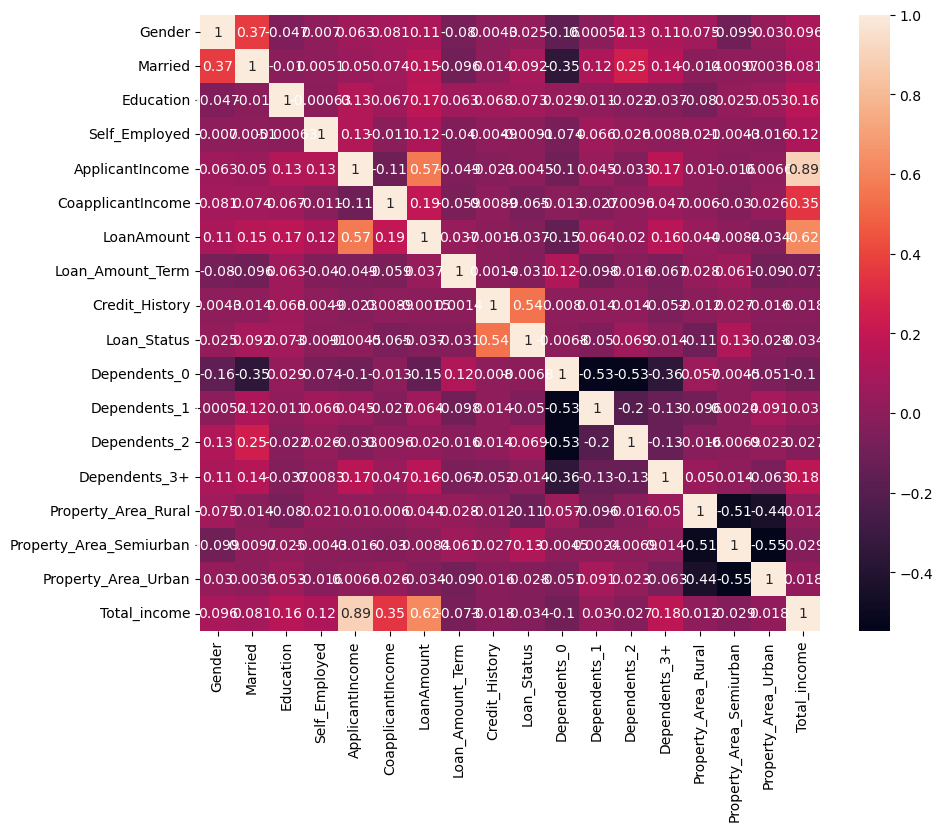

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

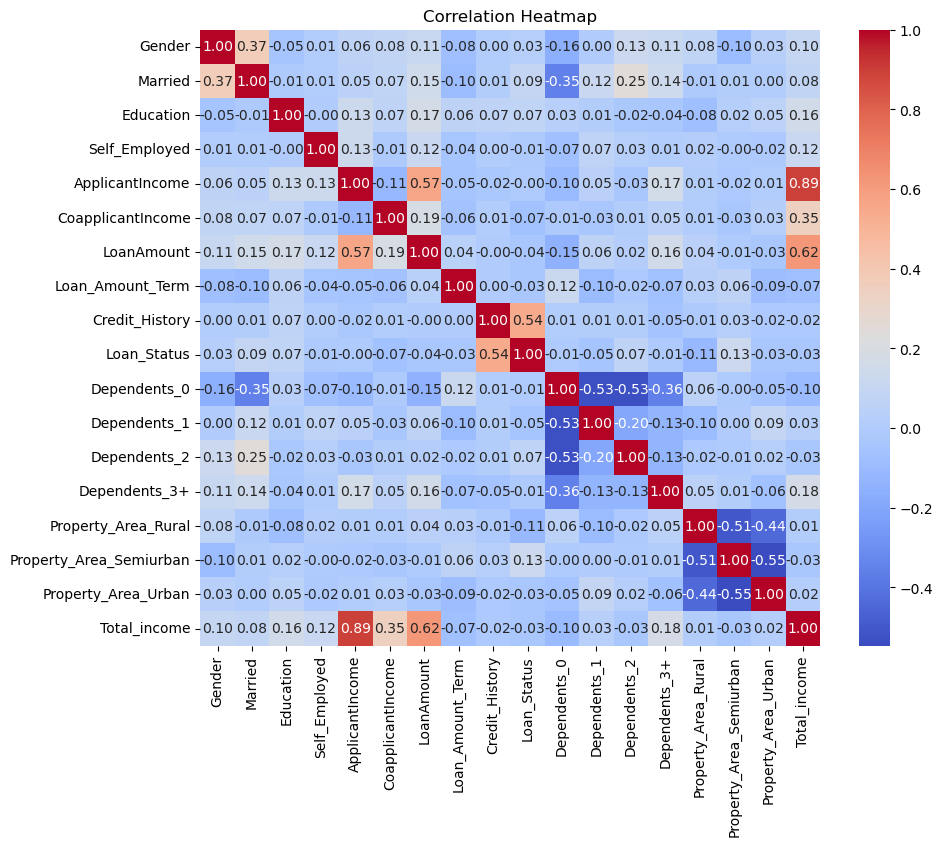

In [33]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
df.shape[1]

18

In [35]:
x= df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

Number of people applied for load gender vise:
1    483
0    109
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

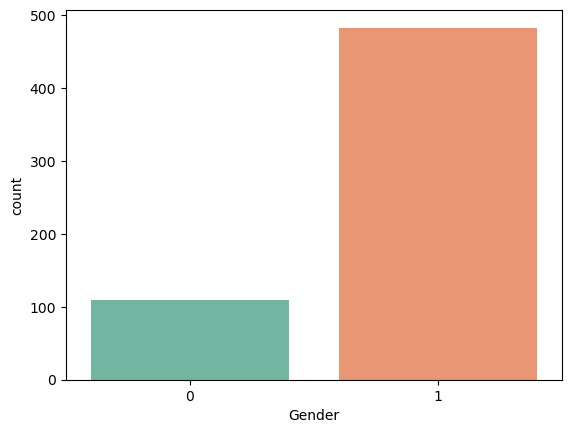

In [36]:
print('Number of people applied for load gender vise:')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data= df, palette='Set2')

Number of people applied for loan Marrital status wise:
1    386
0    206
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

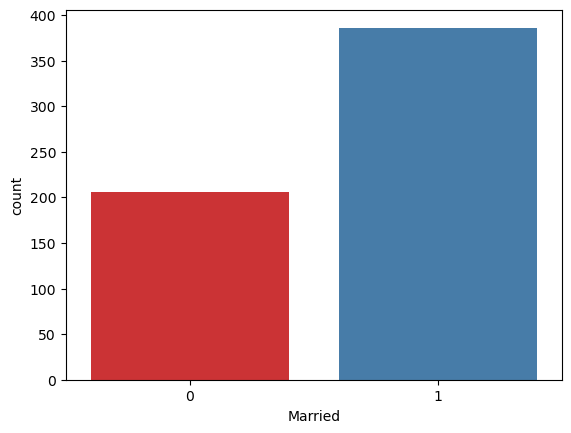

In [37]:
print('Number of people applied for loan Marrital status wise:')
print(df['Married'].value_counts())
sns.countplot(x='Married', data= df, palette='Set1')

Number of people applied for loan Credit_History wise:
1.0    507
0.0     85
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

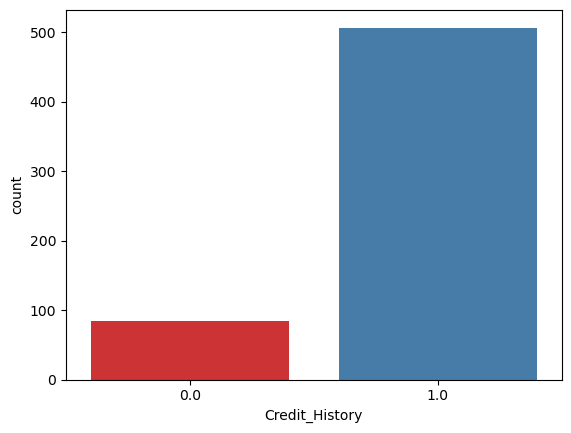

In [38]:
print('Number of people applied for loan Credit_History wise:')
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data= df, palette='Set1') 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.3, random_state= 10)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((414, 17), (178, 17), (414,), (178,))

In [42]:
from sklearn.preprocessing import StandardScaler as std

In [43]:
stds = std()

In [44]:
x_train_std = stds.fit_transform(x_train)
x_test_std = stds.fit_transform(x_test)

# 1St Model RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf= RandomForestClassifier()
rf.fit(x_train_std,y_train)

RandomForestClassifier()

In [47]:
rf.score(x_train_std,y_train)

1.0

In [48]:
rf.score(x_test_std,y_test)

0.797752808988764

In [51]:
rf_Y_pred = rf.predict(x_test_std)
rf_Y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rf_Y_pred)

print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.80


Confusion Matrics

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf_Y_pred,labels=(1,0))

array([[118,  10],
       [ 26,  24]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.48      0.57        50
           1       0.82      0.92      0.87       128

    accuracy                           0.80       178
   macro avg       0.76      0.70      0.72       178
weighted avg       0.79      0.80      0.78       178



# 2nd Model naive_bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb= GaussianNB()
nb.fit(x_train_std, y_train)
nb.score(x_train_std, y_train)

0.8164251207729468

In [60]:
nb.score(x_test_std, y_test)

0.7921348314606742

In [65]:
nb_y_pred= nb.predict(x_test_std)
nb_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,nb_y_pred,labels=(1,0))

array([[117,  11],
       [ 26,  24]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.48      0.56        50
           1       0.82      0.91      0.86       128

    accuracy                           0.79       178
   macro avg       0.75      0.70      0.71       178
weighted avg       0.78      0.79      0.78       178



# 3rd Model DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt= DecisionTreeClassifier(min_samples_split=3)
dt.fit(x_train, y_train)
print(f'Train Data Score is:- {dt.score(x_train, y_train)}')
print(f'Test Data Score is:- {dt.score(x_test, y_test)}')

Train Data Score is:- 0.9879227053140096
Test Data Score is:- 0.7134831460674157


In [77]:
dt_y_pred=dt.predict(x_test)
dt_y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,dt_y_pred,labels=(1,0))

array([[98, 30],
       [21, 29]], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53        50
           1       0.82      0.77      0.79       128

    accuracy                           0.71       178
   macro avg       0.66      0.67      0.66       178
weighted avg       0.73      0.71      0.72       178



# 4th Model KNeighborsClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()
kn.fit(x_train, y_train)
print(f'Train Data Score is:- {kn.score(x_train, y_train)}')
print(f'Test Data Score is:- {kn.score(x_test, y_test)}')

Train Data Score is:- 0.717391304347826
Test Data Score is:- 0.6348314606741573


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [82]:
kn_y_pred= kn.predict(x_test)
kn_y_pred

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,kn_y_pred,labels=(1,0))

array([[105,  23],
       [ 42,   8]], dtype=int64)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, kn_y_pred))

              precision    recall  f1-score   support

           0       0.26      0.16      0.20        50
           1       0.71      0.82      0.76       128

    accuracy                           0.63       178
   macro avg       0.49      0.49      0.48       178
weighted avg       0.59      0.63      0.60       178



In [92]:
data= {'Models': ['rf','nb','dt','kn'],
       'Accuracy': [rf.score(x_test_std,y_test), nb.score(x_test_std,y_test),dt.score(x_test_std,y_test),kn.score(x_test_std,y_test)],
       'F1_Score':[0.87,0.86,0.79,0.76]}
df=pd.DataFrame(data)
df

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Models,Accuracy,F1_Score
0,rf,0.797753,0.87
1,nb,0.792135,0.86
2,dt,0.280899,0.79
3,kn,0.280899,0.76


In [94]:
import pickle 
with open('rf.pkl','wb') as f:
    pickle.dump(rf, f)